In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, make_scorer, f1_score

In [2]:
final_dataset = pd.read_csv('cleaned_data.csv')
final_dataset.head(10)

,age,cigsPerDay,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,male,female,target
0,-1.217670,-0.757524,-0.162324,-0.072187,-0.099863,-0.961110,-1.240737,0.361848,0.391573,-0.177185,-1.145519,1.145519,0
1,-0.397103,-0.757524,-0.162324,-0.072187,-0.099863,0.335695,-0.496956,0.832289,1.685033,-0.262482,0.872966,-0.872966,0
2,-0.162655,0.918782,-0.162324,-0.072187,-0.099863,0.217804,-0.174651,-0.073845,-0.039581,-0.774266,-1.145519,1.145519,0
3,-0.397103,1.170228,-0.162324,-0.072187,-0.099863,1.160935,-0.050687,-0.672588,0.822726,0.505193,0.872966,-0.872966,0
4,-0.748775,-0.757524,-0.162324,-0.072187,-0.099863,-0.183027,2.428583,1.251944,0.132880,1.699355,0.872966,-0.872966,0
5,-0.514327,0.918782,-0.162324,-0.072187,-0.099863,1.821127,-1.538249,-1.052148,0.305342,-0.091888,0.872966,-0.872966,0
6,0.306241,-0.757524,-0.162324,-0.072187,-0.099863,0.571478,0.519545,0.198797,0.046650,-0.006590,-1.145519,1.145519,0
7,-0.748775,1.756935,-0.162324,-0.072187,-0.099863,-0.253762,1.536046,-0.536267,1.512572,0.761085,-1.145519,1.145519,0
8,0.071793,-0.757524,-0.162324,-0.072187,-0.099863,0.430008,0.098069,-0.723374,-0.039581,-0.262482,0.872966,-0.872966,0
9,-0.748775,-0.757524,-0.162324,-0.072187,-0.099863,0.264960,-0.001102,0.540936,-0.298273,-1.541941,0.872966,-0.872966,0


<br>

### Labeling the Dataset and doing Train, Test and Split

In [3]:
X = final_dataset.drop('target', axis=1).to_numpy()
y = final_dataset.target.to_numpy()

# Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=44)

### Selecting the Estimator

In [4]:
logReg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=49)
logReg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=49)

In [5]:
y_pred = logReg.predict(X_test)

In [6]:
logReg.score(X_train, y_train)

0.6624169509786317

In [7]:
logReg.score(X_test, y_test)

0.6776740847092606

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Our model is {accuracy*100:.3f} % accurate.")

Our model is 67.767 % accurate.


In [9]:
cm = confusion_matrix(y_test, y_pred)

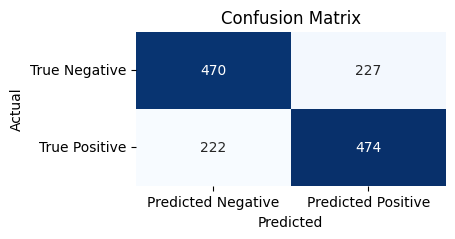

In [10]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
precision = precision_score(y_test, y_pred)
print(f"Our model is {precision*100:.3f} % precised.")

Our model is 67.618 % precised.


In [12]:
recall= recall_score(y_test, y_pred)
print(f"{recall*100:.3f} %")

68.103 %


In [13]:
f1_score(y_test, y_pred)

0.6785969935576235

#### Let's do parameter tuning to find out best result

In [14]:
hyperparameter = {
    "penalty": ['l2'],
    "solver": ['saga', 'sag'],  
    "class_weight": [None, 'balanced'],
    "max_iter": [1000, 1300],  
    "C": [0.01, 0.1, 1, 10, 100]
}

In [15]:
f1_scorer = make_scorer(f1_score)

In [16]:
grid_search  = GridSearchCV(estimator=logReg, param_grid=hyperparameter, cv=3, scoring=f1_scorer)

In [17]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=49),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [1000, 1300], 'penalty': ['l2'],
                         'solver': ['saga', 'sag']},
             scoring=make_scorer(f1_score, response_method='predict'))

In [18]:
logReg.set_params(**grid_search.best_params_)
logReg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=49, solver='saga')

In [19]:
logReg.score(X_test, y_test)

0.678391959798995

In [20]:
y_predict = logReg.predict(X_test)

In [21]:
cm = confusion_matrix(y_test, y_predict)

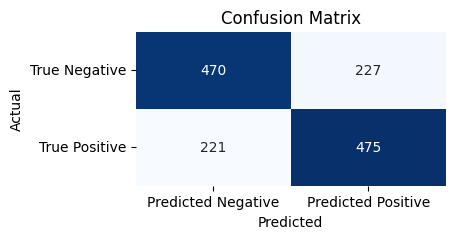

In [22]:
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<br>